##### Context
Since 2000, the largest increase in deaths has been for this disease, rising by more than 2 million to 8.9 million deaths in 2019.Stroke obstructive pulmonary disease is the 2nd leading causes of death, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
data.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [9]:
data.duplicated().value_counts() 

False    5110
dtype: int64

In [10]:
total_nan = data.bmi.isna().sum()
total_len = len(data)
null_percentage = (total_nan/total_len )*100

In [11]:
null_percentage

3.9334637964774952

In [12]:
data.drop(columns=['id'],inplace= True)

In [13]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


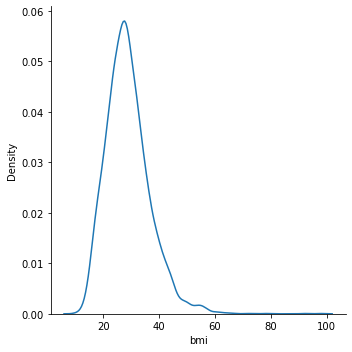

In [14]:
sns.displot(data,x='bmi',kind='kde')

In [15]:
data['bmi'].fillna(data['bmi'].median(),inplace=True)

In [16]:
data['bmi'].isna().sum()

0

In [17]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
# sns.pairplot(data)

In [20]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

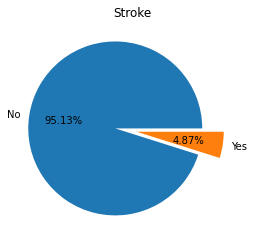

In [21]:
plt.pie(data['stroke'].value_counts(),labels=['No','Yes'],explode = [0.2,0.05],autopct='%1.2f%%')
plt.title("Stroke");

In [22]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


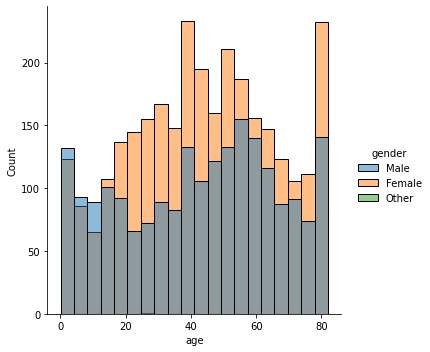

In [23]:
sns.displot(data, x='age',hue='gender')

In [24]:
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [25]:
#since we only have one row of gender lets find the mode from the age  |
data['gender'].replace('Other',data.gender.mode()[0],inplace=True)
data.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


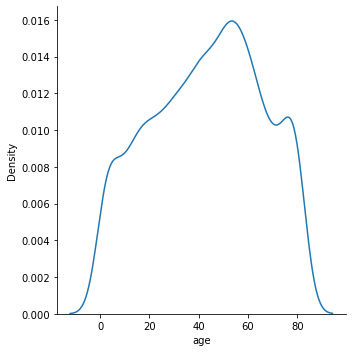

In [26]:
sns.displot(data,x='age',kind='kde')

In [27]:
list(data.age.unique())

[67.0,
 61.0,
 80.0,
 49.0,
 79.0,
 81.0,
 74.0,
 69.0,
 59.0,
 78.0,
 54.0,
 50.0,
 64.0,
 75.0,
 60.0,
 57.0,
 71.0,
 52.0,
 82.0,
 65.0,
 58.0,
 42.0,
 48.0,
 72.0,
 63.0,
 76.0,
 39.0,
 77.0,
 73.0,
 56.0,
 45.0,
 70.0,
 66.0,
 51.0,
 43.0,
 68.0,
 47.0,
 53.0,
 38.0,
 55.0,
 1.32,
 46.0,
 32.0,
 14.0,
 3.0,
 8.0,
 37.0,
 40.0,
 35.0,
 20.0,
 44.0,
 25.0,
 27.0,
 23.0,
 17.0,
 13.0,
 4.0,
 16.0,
 22.0,
 30.0,
 29.0,
 11.0,
 21.0,
 18.0,
 33.0,
 24.0,
 34.0,
 36.0,
 0.64,
 41.0,
 0.88,
 5.0,
 26.0,
 31.0,
 7.0,
 12.0,
 62.0,
 2.0,
 9.0,
 15.0,
 28.0,
 10.0,
 1.8,
 0.32,
 1.08,
 19.0,
 6.0,
 1.16,
 1.0,
 1.4,
 1.72,
 0.24,
 1.64,
 1.56,
 0.72,
 1.88,
 1.24,
 0.8,
 0.4,
 0.08,
 1.48,
 0.56,
 0.48,
 0.16]

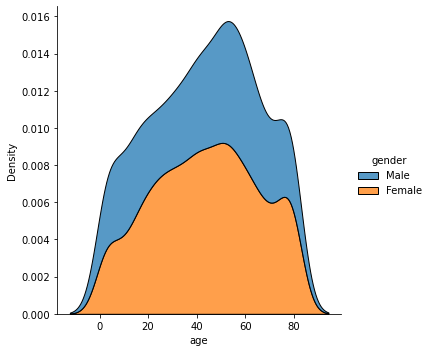

In [28]:
sns.displot(data, x='age',hue='gender',kind='kde',multiple="stack");

In [29]:
def count_values(data):
    columns = data.columns
    for i in columns:
        if data[i].dtype == 'O':
            print(i.upper())
            print(data[i].value_counts())
            print("\n")

In [30]:
count_values(data)

GENDER
Female    2995
Male      2115
Name: gender, dtype: int64


EVER_MARRIED
Yes    3353
No     1757
Name: ever_married, dtype: int64


WORK_TYPE
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


RESIDENCE_TYPE
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


SMOKING_STATUS
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




In [31]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
#categorial data counts with respect to output i.e stroke
import math
def plot_count(data):
    stringCol = [ i for i in data.columns if data[i].dtype=='O']
    column = math.floor(len(stringCol)/2)
    row = math.ceil(len(stringCol)/2)
#     print(row,column)
    for index,value in enumerate(stringCol): 
        plt.figure(figsize=(20,15))
        plt.subplot(row,column,index+1)
        ax = sns.countplot(data[value])
        for p in ax.patches:
               ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.1))

        plt.xticks(rotation = 45)
    

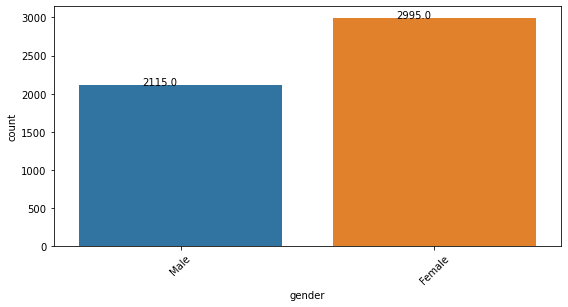

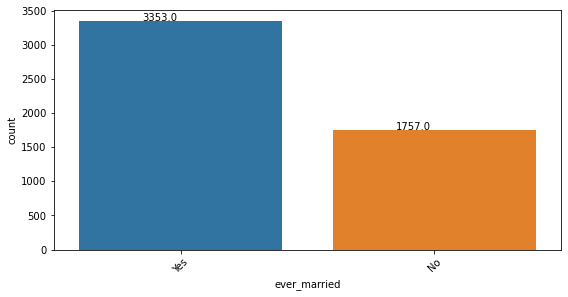

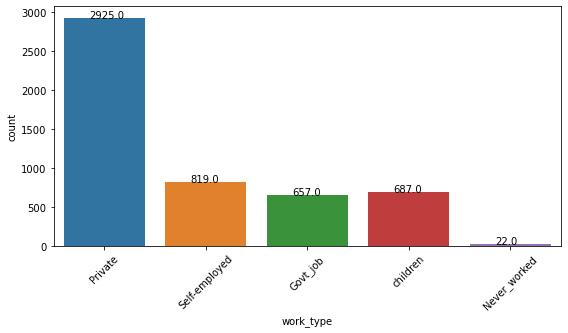

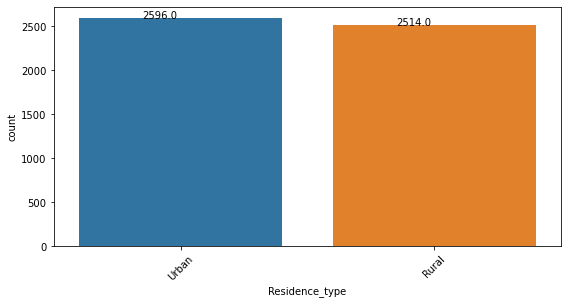

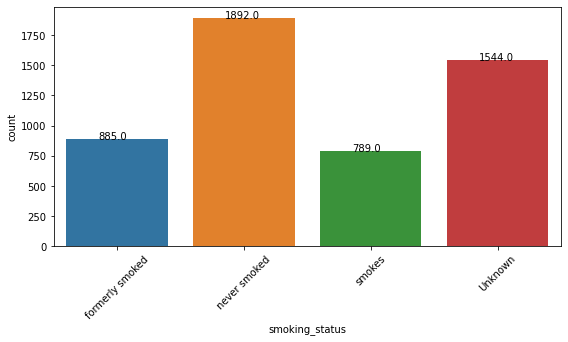

In [34]:
plot_count(data)

In [35]:
def  plot_by_target(data):
    stringCol = [ i for i in data.columns if data[i].dtype=='O']
    for value in (stringCol):
        figure, axis = plt.subplots(figsize=(10,5)) #ax => axis of the current figure
        ct = pd.crosstab(index=data[value],columns=data['stroke'],normalize='index')
        ct.plot(kind='bar',stacked=True,ax=axis)
        axis.legend(loc='upper right', bbox_to_anchor=(1, 0.5), title="Stroke")
        axis.set_xlabel(value)
        axis.set_yticks(np.linspace(0,1,11))
        axis.set_ylabel("Porportion")
        for n, x in enumerate(ct.index):
            for (protion, y_loc) in zip(ct.loc[x], ct.loc[x].cumsum()):
                axis.text(x=n,
                      y=(y_loc - protion) + (protion / 2),
                      s=f'{np.round(protion * 100, 1)}%',
                      fontweight='bold',
                      color='black',
                      fontsize=10,
                      horizontalalignment='center',
                      verticalalignment='center')
            
        
        
        
    

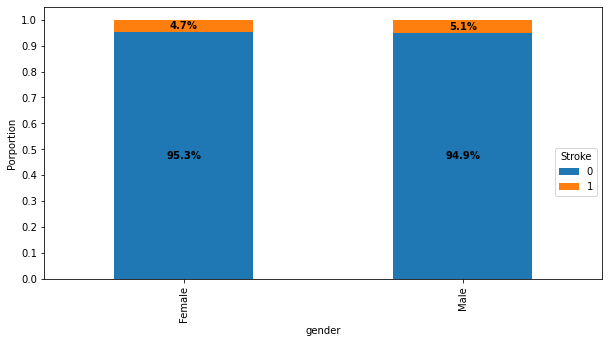

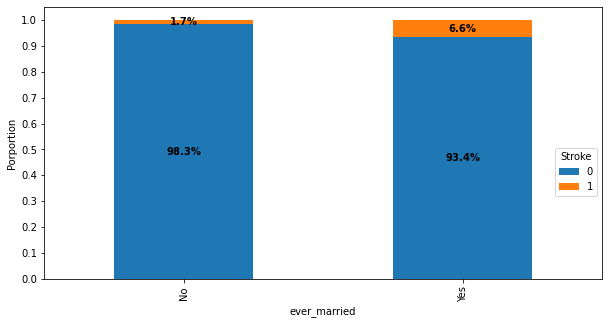

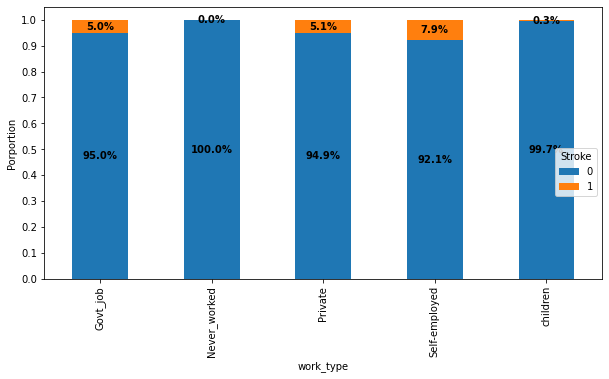

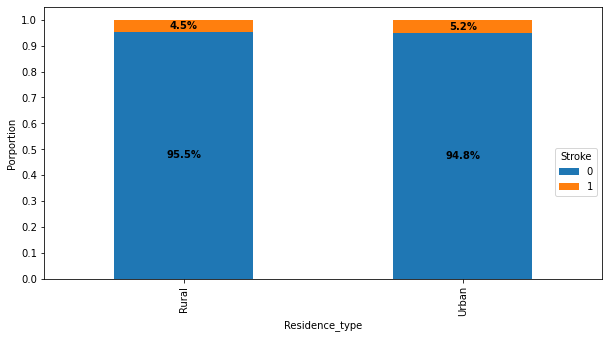

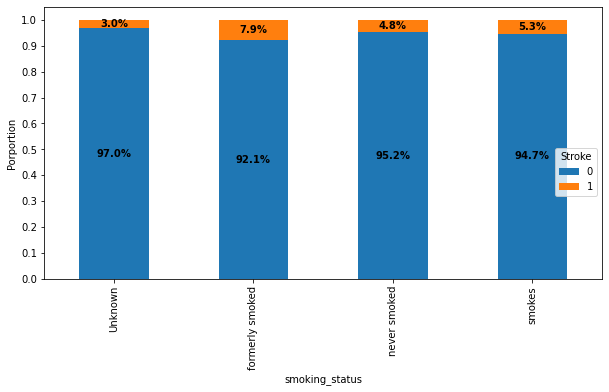

In [36]:
plot_by_target(data)

In [37]:
def handle_unknown(data):
    all_row = []
    for index,(i,j) in enumerate(zip(data.smoking_status,data.stroke)):
        if (i=='Unknown') and (j == 0):
#             data.iloc[index]['smoking_status'] = 'never smoked'
            i = 'never smoked'
    
            all_row.append(i)
        elif (i == 'Unknown') and (j == 1):
#             data.iloc[index]['smoking_status'] = 'formerly smoked'
            i = 'formerly smoked'
    
            all_row.append(i)
        else:
            all_row.append(i)
    return all_row

In [38]:
len(data['smoking_status'])

5110

In [39]:
data['smoking_status']=handle_unknown(data)

In [40]:
data.smoking_status.value_counts()

never smoked       3389
formerly smoked     932
smokes              789
Name: smoking_status, dtype: int64

In [41]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [42]:
#numerical data

In [43]:
data[data['hypertension']==1].stroke.value_counts()


0    432
1     66
Name: stroke, dtype: int64

<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

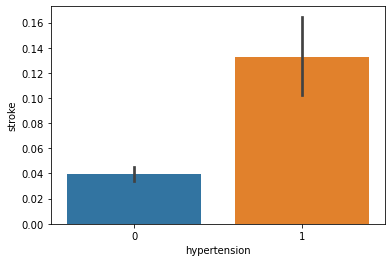

In [44]:
sns.barplot(data=data,x='hypertension',y='stroke')

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

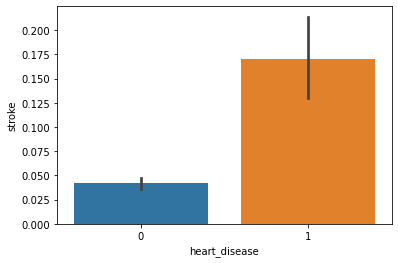

In [45]:
sns.barplot(data=data,x='heart_disease',y='stroke')

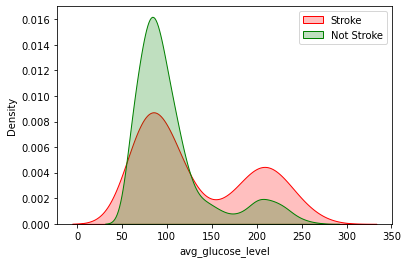

In [46]:
data_stroke1=data[data['stroke']==1]
data_stroke0=data[data['stroke']==0]
sns.kdeplot(data=data_stroke1,x='avg_glucose_level',color='red',fill=True)
sns.kdeplot(data=data_stroke0,x='avg_glucose_level',color='green',fill=True)
plt.legend(['Stroke','Not Stroke'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

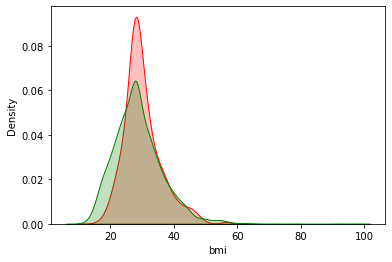

In [47]:
sns.kdeplot(data=data_stroke1,x='bmi',color='red',fill=True)
sns.kdeplot(data=data_stroke0,x='bmi',color='green',fill=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

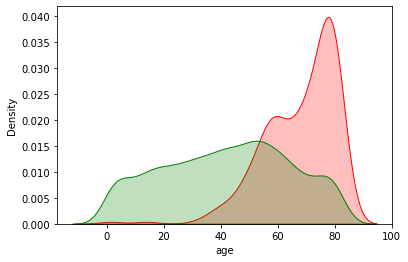

In [48]:
sns.kdeplot(data=data_stroke1,x='age',color='red',fill=True)
sns.kdeplot(data=data_stroke0,x='age',color='green',fill=True)

In [49]:
np.tril(data.corr()).astype('bool')

array([[ True, False, False, False, False, False],
       [ True,  True, False, False, False, False],
       [ True,  True,  True, False, False, False],
       [ True,  True,  True,  True, False, False],
       [ True,  True,  True,  True,  True, False],
       [ True,  True,  True,  True,  True,  True]])

<AxesSubplot:>

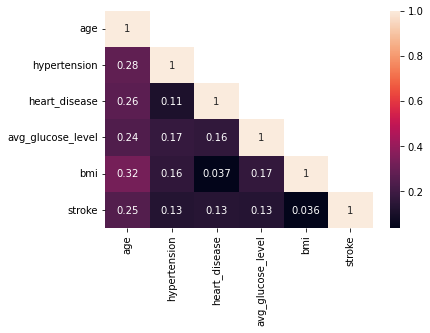

In [50]:
sns.heatmap(data.corr(),mask=~np.tril(data.corr()).astype('bool'),annot=True,cbar=True)

### What Is Multicollinearity?
- Multicollinearity is the occurrence of high intercorrelations among two or more independent variables.
- A perfect correlation is a condition when two independent variables have a +1.0 or -1.0 correlation. 
- Multicollinearity among independent variables will result in less reliable statistical inferences
- It is better to use independent variables that are not correlated or repetitive when building multiple regression models that use two or more variables
- The existence of multicollinearity in a data set can lead to less reliable results due to larger standard errors

In [51]:
 data.select_dtypes(include='category').columns

Index([], dtype='object')

In [52]:
NumericalCol = [ i  for i in data.columns if data[i].dtype!='O' if data[i].value_counts]

In [53]:
# import math
# def plot_boxplot(data):
#     NumericalCol = [ i for i in data.columns if data[i].dtype!='O']
#     fig, axis = plt.subplots(3,2, figsize=(18,12))
#     plt.subplots_adjust(hspace=0.2)
#     row = math.ceil(len(NumericalCol[:-1])/2)
#     col = math.floor(len(NumericalCol[:-1])/2)
#     for i, (column,axs) in enumerate(zip(NumericalCol[:-1],axis.ravel())):
# #         plt.subplots(1, len(NumericalCol[:-1]), figsize=(18,6))
#         sns.boxplot(data=data, x='stroke', y=column,ax=axs)
#         print(NumericalCol)

<AxesSubplot:xlabel='stroke', ylabel='age'>

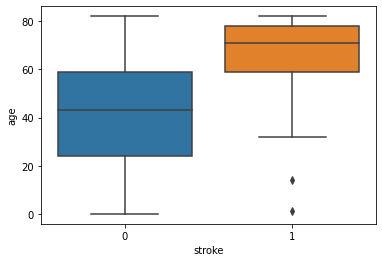

In [54]:
NumerialColumns = ['age','avg_glucose_level','bmi']
sns.boxplot(data=data, x='stroke', y=NumerialColumns[0])

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

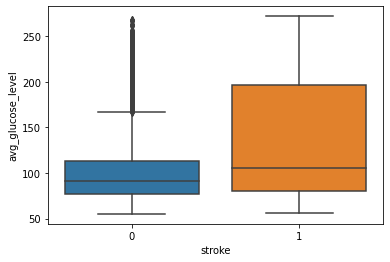

In [55]:
sns.boxplot(data=data, x='stroke', y=NumerialColumns[1])

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

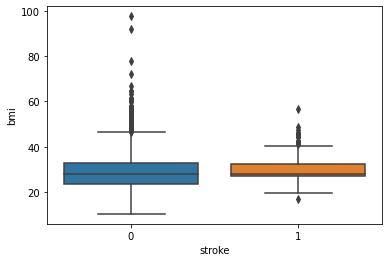

In [56]:
sns.boxplot(data=data, x='stroke', y=NumerialColumns[2])

# Distribution with FacetGrid divide 

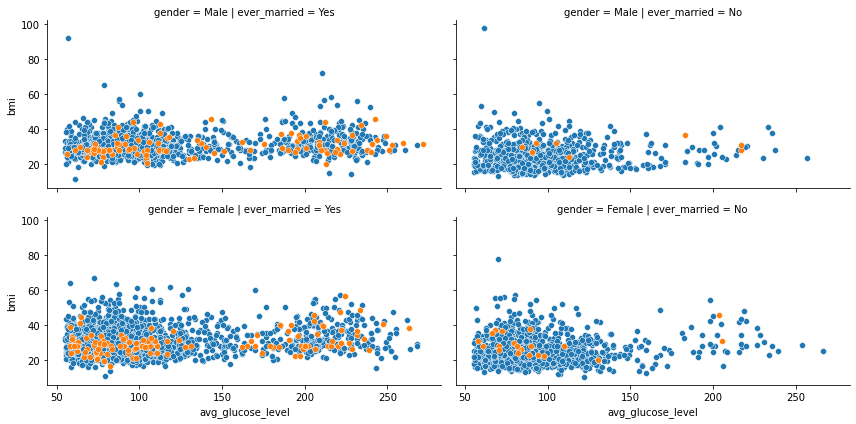

In [57]:
pairwise=sns.FacetGrid(data=data,row='gender',col='ever_married',hue='stroke',aspect=2)
pairwise.map(sns.scatterplot,'avg_glucose_level','bmi')

In [58]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [59]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Handeling Categorical data

## Gender, Residence Type and Ever Married
- This columns consists of categorical value so lets simply convert into 0's and 1's 

In [60]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [61]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [62]:
data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [63]:
data['gender'] = np.where(data.gender=='Male',1,0)
data['ever_married'] = np.where(data.ever_married == 'Yes',1,0)
data['Residence_type'] = np.where(data.Residence_type == 'Urban',1,0)

## Label encoding and one hot encoding

## For Work Type Column 

In [64]:
data.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

- It consists of five unique value and can be ranked so we can use label encoding for this particular column 

In [65]:
work_type = {value:index for index,value in enumerate(data.work_type.unique())}

In [66]:
work_type

{'Private': 0,
 'Self-employed': 1,
 'Govt_job': 2,
 'children': 3,
 'Never_worked': 4}

In [67]:
data.work_type = data.work_type.map(work_type)

## For Smoking Status Column

In [68]:
smoking_status = {value:index for index,value in enumerate(data.smoking_status.unique())}

In [69]:
smoking_status

{'formerly smoked': 0, 'never smoked': 1, 'smokes': 2}

- It consists of three unique value and can be ranked so we can use label encoding for this particular column

In [70]:
data['smoking_status'] = data['smoking_status'].map(smoking_status)

In [71]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,61.0,0,0,1,1,0,202.21,28.1,1,1
2,1,80.0,0,1,1,0,0,105.92,32.5,1,1
3,0,49.0,0,0,1,0,1,171.23,34.4,2,1
4,0,79.0,1,0,1,1,0,174.12,24.0,1,1


In [72]:
from IPython.display import Image
Image(url="https://www.journaldev.com/wp-content/uploads/2020/10/Normalization.png", width=300, height=300)

In [73]:
def normalization(column):
    max_value = max(column)
    min_value = min(column)
    x_norm = 0
    nor_val = []
    for i in column:
        x_norm = (i-min_value)/(max_value-min_value)
        nor_val.append(x_norm)
    return nor_val
        
        

In [74]:
data.age = normalization(data.age)

In [75]:
data.avg_glucose_level = normalization(data.avg_glucose_level)

In [76]:
data.bmi = normalization(data.bmi)

In [77]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,0,1,0.801265,0.301260,0,1
1,0,0.743652,0,0,1,1,0,0.679023,0.203895,1,1
2,1,0.975586,0,1,1,0,0,0.234512,0.254296,1,1
3,0,0.597168,0,0,1,0,1,0.536008,0.276060,2,1
4,0,0.963379,1,0,1,1,0,0.549349,0.156930,1,1


# Correlation
- Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate).

In [78]:
data.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027623,0.021275,0.085717,-0.029936,0.065963,-0.005937,0.054580,-0.026310,-0.022492,0.009117
age,-0.027623,1.000000,0.276398,0.263796,0.679125,-0.413270,0.014180,0.238171,0.324296,-0.124928,0.245257
hypertension,0.021275,0.276398,1.000000,0.108306,0.164243,-0.075097,-0.007913,0.174474,0.158293,-0.018286,0.127904
heart_disease,0.085717,0.263796,0.108306,1.000000,0.114644,-0.058263,0.003092,0.161857,0.036916,-0.024309,0.134914
ever_married,-0.029936,0.679125,0.164243,0.114644,1.000000,-0.375944,0.006261,0.155068,0.334911,-0.052005,0.108340
work_type,0.065963,-0.413270,-0.075097,-0.058263,-0.375944,1.000000,0.014573,-0.068135,-0.341500,-0.016048,-0.058224
Residence_type,-0.005937,0.014180,-0.007913,0.003092,0.006261,0.014573,1.000000,-0.004946,-0.000277,0.008541,0.015458
avg_glucose_level,0.054580,0.238171,0.174474,0.161857,0.155068,-0.068135,-0.004946,1.000000,0.166876,-0.040004,0.131945
bmi,-0.026310,0.324296,0.158293,0.036916,0.334911,-0.341500,-0.000277,0.166876,1.000000,-0.015003,0.036110
smoking_status,-0.022492,-0.124928,-0.018286,-0.024309,-0.052005,-0.016048,0.008541,-0.040004,-0.015003,1.000000,-0.106678


### Seperating Input/ Independent and Output/Dependent/target variable 

In [79]:
X = data.iloc[:,:-1] # input variables
y = data['stroke'] #output variable

In [80]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [81]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,0.816895,0,1,1,0,1,0.801265,0.301260,0
1,0,0.743652,0,0,1,1,0,0.679023,0.203895,1
2,1,0.975586,0,1,1,0,0,0.234512,0.254296,1
3,0,0.597168,0,0,1,0,1,0.536008,0.276060,2
4,0,0.963379,1,0,1,1,0,0.549349,0.156930,1


### Train Test Split
- The train-test split is a technique for evaluating the performance of a machine learning algorithm.
- Train Dataset: Used to fit the machine learning model.
- Test Dataset: Used to evaluate the fit machine learning model.

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

## Building model

In [83]:
len(y_test)

1022

In [84]:
len([i for i in y_test if i == 0])

960

In [85]:
# since our dataset is imblanced we will be using StratifiedKFold CV
from sklearn.model_selection import StratifiedKFold
#cross validation
skflod = StratifiedKFold(n_splits=10)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [87]:
from sklearn.metrics import roc_curve,accuracy_score
from sklearn.metrics import confusion_matrix,precision_score, recall_score,f1_score,roc_auc_score,classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score


### Logistic Regression

In [88]:
log = LogisticRegression()
log.fit(X_train,y_train)
log_pre = log.predict(X_test)

In [89]:
confusion_matrix(y_test,log_pre)

array([[960,   0],
       [ 62,   0]], dtype=int64)

In [90]:
print(classification_report(y_test,log_pre))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [91]:
roc_auc_score(y_test,log_pre)

0.5

In [92]:
score = cross_val_score(log,X_train,y_train,cv=skflod)
print(score)
print(score.mean())

[0.95599022 0.95354523 0.95354523 0.95354523 0.95354523 0.95354523
 0.95354523 0.95354523 0.95588235 0.95588235]
0.9542571551848121


In [93]:
grid={"penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=GridSearchCV(log,grid,cv=skflod)
logreg_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
pre = logreg_cv.predict(X_test)
confusion_matrix(y_test,pre)

tuned hpyerparameters :(best parameters)  {'penalty': 'l2'}
accuracy : 0.9542571551848121


array([[960,   0],
       [ 62,   0]], dtype=int64)

### Decision Tree Classifier

In [94]:
dec = DecisionTreeClassifier()
dec.fit(X_train,y_train)
dec_pre = dec.predict(X_test)

In [95]:
confusion_matrix(y_test,dec_pre)

array([[915,  45],
       [ 46,  16]], dtype=int64)

In [96]:
print(classification_report(y_test,dec_pre))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.26      0.26      0.26        62

    accuracy                           0.91      1022
   macro avg       0.61      0.61      0.61      1022
weighted avg       0.91      0.91      0.91      1022



In [97]:
roc_auc_score(y_test,dec_pre)

0.6055947580645161

In [98]:
score = cross_val_score(dec,X_train,y_train,cv=skflod)
print(score)
print(score.mean())

[0.90953545 0.91687042 0.92176039 0.90464548 0.90464548 0.90464548
 0.92665037 0.92420538 0.92156863 0.93382353]
0.9168350592070569


In [99]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dec_cv=GridSearchCV(dec,params,cv=skflod)
dec_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",dec_cv.best_params_)
print("accuracy :",dec_cv.best_score_)
pre = dec_cv.predict(X_test)
confusion_matrix(y_test,pre)

tuned hpyerparameters :(best parameters)  {'max_leaf_nodes': 2, 'min_samples_split': 2}
accuracy : 0.9542571551848121


array([[960,   0],
       [ 62,   0]], dtype=int64)

In [100]:
roc_auc_score(y_test,pre)

0.5

In [101]:
from sklearn.tree import export_graphviz

In [102]:
export_graphviz( 
 dec_cv.best_estimator_,
 out_file=("stroke_tree.dot"),
 filled=True,
)

### Random Forest 

In [103]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
forest_pre = forest.predict(X_test)

In [104]:
confusion_matrix(y_test,forest_pre)

array([[960,   0],
       [ 60,   2]], dtype=int64)

In [105]:
print(classification_report(y_test,forest_pre))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.97      0.52      0.52      1022
weighted avg       0.94      0.94      0.91      1022



In [106]:
roc_auc_score(y_test,forest_pre)

0.5161290322580645

In [107]:
score = cross_val_score(dec,X_train,y_train,cv=skflod)
print(score)
print(score.mean())

[0.90709046 0.91198044 0.92176039 0.89486553 0.91198044 0.89486553
 0.92665037 0.93154034 0.92156863 0.93382353]
0.9156125653195264


In [108]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

forest_cv=GridSearchCV(forest,param_grid,cv=skflod)
forest_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",forest_cv.best_params_)
print("accuracy :",forest_cv.best_score_)
pre = forest_cv.predict(X_test)
confusion_matrix(y_test,pre)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
accuracy : 0.9542571551848121


array([[960,   0],
       [ 62,   0]], dtype=int64)

In [109]:
roc_auc_score(y_test,pre)

0.5

### K-NN

In [110]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pre = knn.predict(X_test)

In [111]:
confusion_matrix(y_test,knn_pre)

array([[956,   4],
       [ 59,   3]], dtype=int64)

In [112]:
print(classification_report(y_test,knn_pre))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.43      0.05      0.09        62

    accuracy                           0.94      1022
   macro avg       0.69      0.52      0.53      1022
weighted avg       0.91      0.94      0.91      1022



In [113]:
roc_auc_score(y_test,knn_pre)

0.5221102150537634

In [114]:
score = cross_val_score(knn,X_train,y_train,cv=skflod)
print(score)
print(score.mean())

[0.95354523 0.94621027 0.95354523 0.94865526 0.95354523 0.95354523
 0.95110024 0.95354523 0.95588235 0.95588235]
0.9525456637422695


In [115]:
param = {'n_neighbors':[i for i in range(1,31)],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'leaf_size':[30,40,50],
    'p':[1,2]}
knn_cv = GridSearchCV(knn, param, cv=skflod, scoring='accuracy')
knn_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
pre = knn.predict(X_test)
confusion_matrix(y_test,pre)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 2, 'p': 1}
accuracy : 0.9549924493024594


array([[956,   4],
       [ 59,   3]], dtype=int64)